<a href="https://colab.research.google.com/github/basakbozkurt/fact_checking/blob/main/metrics_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Model  Parameter  Accuracy_mc  F1_Score_mc  Accuracy_b  F1_Score_b
0     phi3:3.8b        8.0    18.165337    10.142201   50.888325   66.310160
1  mixtral:8x7b       12.9    23.067076    16.898925   59.088582   61.456826
2     llama3:8b        8.0    20.861148    11.508935   64.335781   55.691478
3    gemma2:27b       27.0    21.032090    19.328128   60.516045   53.343582
4     gemma2:9b        9.0    25.256777    17.925947   67.469271   65.683837
5    mistral:7b        7.0    22.482668    14.032258   69.692968   67.400568
6      qwen2:7b        7.0    23.856859    19.917329   66.275077   64.101578
7     qwen2:72b       72.0    28.730797    23.822866   76.389905   77.251101
8    llama3:70b       70.0    27.908155    23.222271   74.202262   74.310693
9      phi3:14b       14.0    22.573727    18.723007   67.721180   71.159374


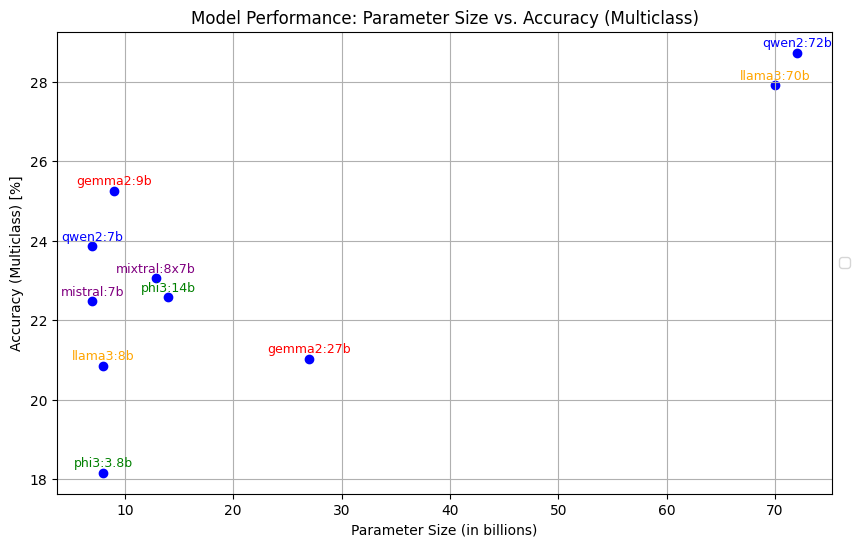

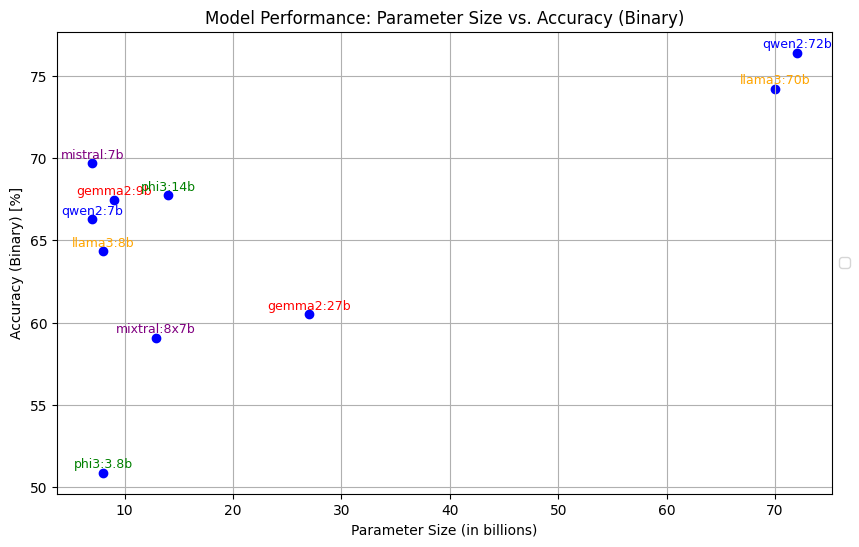

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



data = {
    'Model': ['phi3:3.8b', 'mixtral:8x7b', 'llama3:8b', 'gemma2:27b', 'gemma2:9b', 'mistral:7b', 'qwen2:7b', 'qwen2:72b', 'llama3:70b', 'phi3:14b'],
    'Parameter': [8, 12.9, 8, 27, 9, 7, 7, 72, 70, 14],
    'Accuracy_mc': [0.18165337200870196, 0.23067076292882743, 0.2086114819759679, 0.2103209019947962, 0.25256777235224787, 0.2248266754704523, 0.23856858846918488, 0.28730797366495975, 0.27908154651359107, 0.2257372654155496],
    'F1_Score_mc': [0.1014220123017006, 0.1689892501611514, 0.11508935034843315, 0.19328128116342136, 0.17925947288255492,  0.140322578795139, 0.19917328758189168, 0.23822865655263906, 0.2322227107604561, 0.18723006571707337],
    'Accuracy_b': [0.5088832487309645, 0.5908858166922683, 0.6433578104138852, 0.6051604509973981, 0.6746927092103048, 0.6969296797622978, 0.6627507681185614, 0.763899049012436, 0.7420226236704373, 0.6772117962466488],
    'F1_Score_b': [0.6631016042780749, 0.6145682585624699, 0.5569147833298776, 0.5334358186010761, 0.6568383658969804, 0.6740056818181818, 0.6410157752981916, 0.772511013215859, 0.7431069266980498, 0.7115937400191632]
}


df = pd.DataFrame(data)


df[['Accuracy_mc', 'F1_Score_mc', 'Accuracy_b', 'F1_Score_b']] = df[['Accuracy_mc', 'F1_Score_mc', 'Accuracy_b', 'F1_Score_b']] * 100


print(df)



selected_models = ['phi3:3.8b', 'mixtral:8x7b', 'llama3:8b', 'qwen2:72b']
selected_df_mc = df[df['Model'].isin(selected_models)].sort_values(by='Parameter')
selected_df_b = df[df['Model'].isin(selected_models)].sort_values(by='Accuracy_b')

label_colors = []
for model in df['Model']:
    if 'phi' in model:
        label_colors.append('green')
    elif 'mixtral' in model or 'mistral' in model:
        label_colors.append('purple')
    elif 'llama' in model:
        label_colors.append('orange')
    elif 'gemma' in model:
        label_colors.append('red')
    elif 'qwen' in model:
        label_colors.append('blue')
    else:
        label_colors.append('black')



plt.figure(figsize=(10, 6))
plt.scatter(df['Parameter'], df['Accuracy_mc'], color='blue')

for i, row in df.iterrows():
    plt.text(row['Parameter'], row['Accuracy_mc'] + 0.15, row['Model'], fontsize=9, ha='center', color=label_colors[i])


#plt.plot(selected_df_mc['Parameter'], selected_df_mc['Accuracy_mc'], linestyle='--', color='black', marker='o')

plt.xlabel('Parameter Size (in billions)')
plt.ylabel('Accuracy (Multiclass) [%]')
plt.title('Model Performance: Parameter Size vs. Accuracy (Multiclass)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

 # Binary accuracy
plt.figure(figsize=(10, 6))
plt.scatter(df['Parameter'], df['Accuracy_b'], color='blue')

for i, row in df.iterrows():
    plt.text(row['Parameter'], row['Accuracy_b'] + 0.30, row['Model'], fontsize=9, ha='center', color=label_colors[i])

plt.xlabel('Parameter Size (in billions)')
plt.ylabel('Accuracy (Binary) [%]')
plt.title('Model Performance: Parameter Size vs. Accuracy (Binary)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


          Model  Parameter  Accuracy_mc  F1_Score_mc  Accuracy_b  F1_Score_b
0     phi3:3.8b        8.0    18.165337    10.142201   50.888325   66.310160
1  mixtral:8x7b       12.9    23.067076    16.898925   59.088582   61.456826
2     llama3:8b        8.0    20.861148    11.508935   64.335781   55.691478
3    gemma2:27b       27.0    21.032090    19.328128   60.516045   53.343582
4     gemma2:9b        9.0    25.256777    17.925947   67.469271   65.683837
5    mistral:7b        7.0    22.482668    14.032258   69.692968   67.400568
6      qwen2:7b        7.0    23.856859    19.917329   66.275077   64.101578
7     qwen2:72b       72.0    28.730797    23.822866   76.389905   77.251101
8    llama3:70b       70.0    27.908155    23.222271   74.202262   74.310693
9      phi3:14b       14.0    22.573727    18.723007   67.721180   71.159374


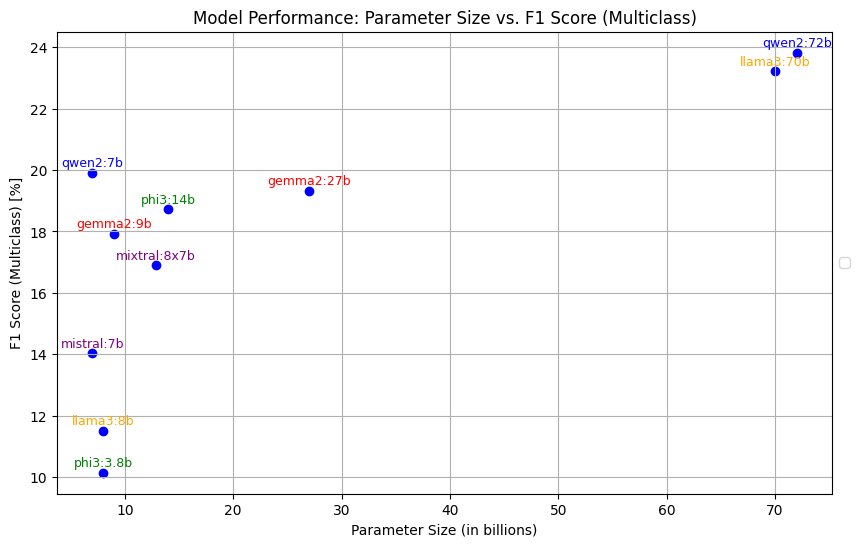

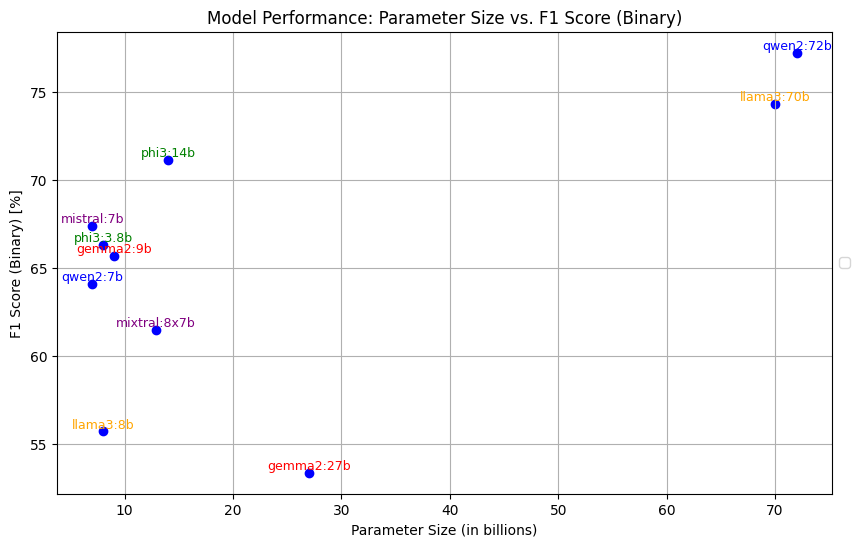

In [ ]:
print(df)


selected_df_mc = df[df['Model'].isin(selected_models)].sort_values(by='F1_Score_mc')
selected_df_b = df[df['Model'].isin(selected_models)].sort_values(by='F1_Score_b')



plt.figure(figsize=(10, 6))
plt.scatter(df['Parameter'], df['F1_Score_mc'], color='blue')

for i, row in df.iterrows():
    plt.text(row['Parameter'], row['F1_Score_mc'] + 0.20, row['Model'], fontsize=9, ha='center', color=label_colors[i])

#plt.plot(selected_df_mc['Parameter'], selected_df_mc['F1_Score_mc'], linestyle='--', color='black', marker='o')

plt.xlabel('Parameter Size (in billions)')
plt.ylabel('F1 Score (Multiclass) [%]')
plt.title('Model Performance: Parameter Size vs. F1 Score (Multiclass)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Parameter'], df['F1_Score_b'], color='blue')

for i, row in df.iterrows():
    plt.text(row['Parameter'], row['F1_Score_b'] + 0.20, row['Model'], fontsize=9, ha='center', color=label_colors[i])

#plt.plot(selected_df_b['Parameter'], selected_df_b['F1_Score_b'], linestyle='--', color='black', marker='o')

plt.xlabel('Parameter Size (in billions)')
plt.ylabel('F1 Score (Binary) [%]')
plt.title('Model Performance: Parameter Size vs. F1 Score (Binary)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()
